In [1]:
import numpy as np,os,pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics
import graphviz
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline

In [2]:
os.chdir('E:\Machine learning course\Raw data\ppt')

In [3]:
covid = pd.read_excel("covid_data.xlsx")

In [4]:
pd.set_option("display.max_columns",100)
covid.head()

,CMRN,Facility,Current Age,Age Group,Nationality,OCCUPATION,Sex,VACCINE_NAME,Vaccination Date,Second Vaccination Date,Booster Vaccination Date,Positive After Second Vaccination,Positive After Second Vaccination Date,# Day Between 2nd Vaccination to Positive,Diabetes mellitus,Hypertension,ISCHEMIC HEART DISEASE,BMI,BMI Group,Patient Status,DECEASED DATE TIME,Admit After 2nd Vaccination Status,Admit After 2nd Vaccination,ICU Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination,Ventilator Used after 2nd Vaccination Status,Ventilator Used after 2nd Vaccination,Patient Outcome after 2nd Vacc
0,1,CQSM SALAMA CLINIC - UAQ,73,>60,EMIRATI,16 years and above - Public vaccination,Female,Pfizer-BioNTech COVID-19 Vaccine,2021-05-24 11:05:37,NaT,NaT,No,NaT,NaN,Yes,No,No,19,<20,No,NaT,No,NaT,No,NaT,No,NaT,NaN
1,2,CQFM Falaj Clinic - UAQ,9,<12,EMIRATI,Age 3-15 Public Vaccination,Male,Sinopharm BIBP (inactivated),2021-08-15 13:36:00,NaT,NaT,No,NaT,NaN,No,No,No,12.79,<20,No,NaT,No,NaT,No,NaT,No,NaT,NaN
2,3,CQKZ Al Khazan Health Center,19,19-30,EMIRATI,16 years and above - Public vaccination,Female,Sinopharm BIBP (inactivated),2021-01-12 18:54:32,2021-02-03 19:48:12,NaT,No,NaT,NaN,No,No,No,23,20-24.9,No,NaT,No,NaT,No,NaT,No,NaT,NaN
3,4,MUH Umm Al Quwain,36,31-40,EGYPTIAN,Government health care workers,Male,Sinopharm BIBP (inactivated),2021-01-03 13:23:00,2021-01-25 12:17:47,NaT,Yes,2021-03-12 20:24:49,46.338194,No,No,No,34,30-34.9,No,NaT,No,NaT,No,NaT,No,NaT,NaN
4,5,CQSM SALAMA CLINIC - UAQ,38,31-40,BANGLADESHI,16 years and above - Public vaccination,Male,Sinopharm BIBP (inactivated),2021-04-06 12:47:14,2021-05-11 20:46:33,NaT,No,NaT,NaN,No,No,No,NaN,NaN,No,NaT,No,NaT,No,NaT,No,NaT,NaN


In [5]:
covid.columns

Index(['CMRN', 'Facility', 'Current Age', 'Age Group', 'Nationality',
       'OCCUPATION', 'Sex', 'VACCINE_NAME', 'Vaccination Date',
       'Second Vaccination Date', 'Booster Vaccination Date',
       'Positive After Second Vaccination',
       'Positive After Second Vaccination Date',
       '# Day Between 2nd Vaccination to Positive', 'Diabetes mellitus',
       'Hypertension', 'ISCHEMIC HEART DISEASE', 'BMI', 'BMI Group',
       'Patient Status', 'DECEASED DATE TIME',
       'Admit After 2nd Vaccination Status', 'Admit After 2nd Vaccination',
       'ICU Admit After 2nd Vaccination Status',
       'ICU Admit After 2nd Vaccination',
       'Ventilator Used after 2nd Vaccination Status',
       'Ventilator Used after 2nd Vaccination',
       'Patient Outcome after 2nd Vacc'],
      dtype='object')

In [6]:
covid["Sex"] = np.where(covid.Sex=="Male",1,0)
covid["Diabetes mellitus"] = np.where(covid["Diabetes mellitus"]=="Yes",1,0)
covid["Hypertension"] = np.where(covid.Hypertension=="Yes",1,0)
covid["ISCHEMIC HEART DISEASE"] = np.where(covid["ISCHEMIC HEART DISEASE"]=="Yes",1,0)
covid["BMI"] = np.where(covid["BMI"]=="Yes",1,0)
covid["Patient Status"]= np.where(covid["Patient Status"]=="Yes",1,0)
covid["Admit After 2nd Vaccination Status"] = np.where(covid["Admit After 2nd Vaccination Status"]=="Yes",1,0)
covid["ICU Admit After 2nd Vaccination Status"] = np.where(covid["ICU Admit After 2nd Vaccination Status"]=="Yes",1,0)
covid["Ventilator Used after 2nd Vaccination Status"]=np.where(covid["Ventilator Used after 2nd Vaccination Status"]=="Yes",1,0)

In [7]:
pd.set_option("display.max_columns",100)
covid.head(3)

,CMRN,Facility,Current Age,Age Group,Nationality,OCCUPATION,Sex,VACCINE_NAME,Vaccination Date,Second Vaccination Date,Booster Vaccination Date,Positive After Second Vaccination,Positive After Second Vaccination Date,# Day Between 2nd Vaccination to Positive,Diabetes mellitus,Hypertension,ISCHEMIC HEART DISEASE,BMI,BMI Group,Patient Status,DECEASED DATE TIME,Admit After 2nd Vaccination Status,Admit After 2nd Vaccination,ICU Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination,Ventilator Used after 2nd Vaccination Status,Ventilator Used after 2nd Vaccination,Patient Outcome after 2nd Vacc
0,1,CQSM SALAMA CLINIC - UAQ,73,>60,EMIRATI,16 years and above - Public vaccination,0,Pfizer-BioNTech COVID-19 Vaccine,2021-05-24 11:05:37,NaT,NaT,No,NaT,NaN,1,0,0,0,<20,0,NaT,0,NaT,0,NaT,0,NaT,NaN
1,2,CQFM Falaj Clinic - UAQ,9,<12,EMIRATI,Age 3-15 Public Vaccination,1,Sinopharm BIBP (inactivated),2021-08-15 13:36:00,NaT,NaT,No,NaT,NaN,0,0,0,0,<20,0,NaT,0,NaT,0,NaT,0,NaT,NaN
2,3,CQKZ Al Khazan Health Center,19,19-30,EMIRATI,16 years and above - Public vaccination,0,Sinopharm BIBP (inactivated),2021-01-12 18:54:32,2021-02-03 19:48:12,NaT,No,NaT,NaN,0,0,0,0,20-24.9,0,NaT,0,NaT,0,NaT,0,NaT,NaN


In [8]:
covid["Days_to_second_dose"]= (covid["Second Vaccination Date"]-covid["Vaccination Date"]).dt.days
covid['Days_to_second_dose'] = covid['Days_to_second_dose'].round()

In [9]:
covid.head()

,CMRN,Facility,Current Age,Age Group,Nationality,OCCUPATION,Sex,VACCINE_NAME,Vaccination Date,Second Vaccination Date,Booster Vaccination Date,Positive After Second Vaccination,Positive After Second Vaccination Date,# Day Between 2nd Vaccination to Positive,Diabetes mellitus,Hypertension,ISCHEMIC HEART DISEASE,BMI,BMI Group,Patient Status,DECEASED DATE TIME,Admit After 2nd Vaccination Status,Admit After 2nd Vaccination,ICU Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination,Ventilator Used after 2nd Vaccination Status,Ventilator Used after 2nd Vaccination,Patient Outcome after 2nd Vacc,Days_to_second_dose
0,1,CQSM SALAMA CLINIC - UAQ,73,>60,EMIRATI,16 years and above - Public vaccination,0,Pfizer-BioNTech COVID-19 Vaccine,2021-05-24 11:05:37,NaT,NaT,No,NaT,NaN,1,0,0,0,<20,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaN
1,2,CQFM Falaj Clinic - UAQ,9,<12,EMIRATI,Age 3-15 Public Vaccination,1,Sinopharm BIBP (inactivated),2021-08-15 13:36:00,NaT,NaT,No,NaT,NaN,0,0,0,0,<20,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaN
2,3,CQKZ Al Khazan Health Center,19,19-30,EMIRATI,16 years and above - Public vaccination,0,Sinopharm BIBP (inactivated),2021-01-12 18:54:32,2021-02-03 19:48:12,NaT,No,NaT,NaN,0,0,0,0,20-24.9,0,NaT,0,NaT,0,NaT,0,NaT,NaN,22.0
3,4,MUH Umm Al Quwain,36,31-40,EGYPTIAN,Government health care workers,1,Sinopharm BIBP (inactivated),2021-01-03 13:23:00,2021-01-25 12:17:47,NaT,Yes,2021-03-12 20:24:49,46.338194,0,0,0,0,30-34.9,0,NaT,0,NaT,0,NaT,0,NaT,NaN,21.0
4,5,CQSM SALAMA CLINIC - UAQ,38,31-40,BANGLADESHI,16 years and above - Public vaccination,1,Sinopharm BIBP (inactivated),2021-04-06 12:47:14,2021-05-11 20:46:33,NaT,No,NaT,NaN,0,0,0,0,NaN,0,NaT,0,NaT,0,NaT,0,NaT,NaN,35.0


In [10]:
covid["Positive_After_Second_Dose"] = np.where(covid["Positive After Second Vaccination"]=="Yes",1,0)

In [11]:
covid["Positive_After_Second_Dose"].value_counts()

0    122129
1      2371
Name: Positive_After_Second_Dose, dtype: int64

In [12]:
covid.head(2)

,CMRN,Facility,Current Age,Age Group,Nationality,OCCUPATION,Sex,VACCINE_NAME,Vaccination Date,Second Vaccination Date,Booster Vaccination Date,Positive After Second Vaccination,Positive After Second Vaccination Date,# Day Between 2nd Vaccination to Positive,Diabetes mellitus,Hypertension,ISCHEMIC HEART DISEASE,BMI,BMI Group,Patient Status,DECEASED DATE TIME,Admit After 2nd Vaccination Status,Admit After 2nd Vaccination,ICU Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination,Ventilator Used after 2nd Vaccination Status,Ventilator Used after 2nd Vaccination,Patient Outcome after 2nd Vacc,Days_to_second_dose,Positive_After_Second_Dose
0,1,CQSM SALAMA CLINIC - UAQ,73,>60,EMIRATI,16 years and above - Public vaccination,0,Pfizer-BioNTech COVID-19 Vaccine,2021-05-24 11:05:37,NaT,NaT,No,NaT,NaN,1,0,0,0,<20,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaN,0
1,2,CQFM Falaj Clinic - UAQ,9,<12,EMIRATI,Age 3-15 Public Vaccination,1,Sinopharm BIBP (inactivated),2021-08-15 13:36:00,NaT,NaT,No,NaT,NaN,0,0,0,0,<20,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaN,0


In [13]:
covid.shape

(124500, 30)

In [14]:
covid.Nationality.value_counts().nlargest(10)

INDIAN         47587
PAKISTANI      20551
EMIRATI        14272
BANGLADESHI    13392
NEPALESE        3989
EGYPTIAN        3871
FILIPINO        3704
SRI LANKAN      1710
ETHIOPIAN       1646
COMORAN         1641
Name: Nationality, dtype: int64

In [15]:
covid.OCCUPATION.value_counts().nlargest(10)

16 years and above - Public vaccination    88803
Private Sector                              9879
Labors                                      3494
Government Sector                           3491
Students                                    3358
Government - MOHRE                          2796
Age 3-15 Public Vaccination                 1857
Government health care workers              1690
Police sector                               1644
General Transportation (Buses & Taxi)       1326
Name: OCCUPATION, dtype: int64

In [16]:
covid.Facility.value_counts().nlargest(10)

CQSM SALAMA CLINIC - UAQ             103911
CQFM Falaj Clinic - UAQ                8740
CQKZ Al Khazan Health Center           6932
CQRA RAFA CLINIC - UAQ                 2667
MUH Umm Al Quwain                      2151
PMQR Preventive Medicine - UAQ           95
CQDS UAQ Specilized Dental Center         4
Name: Facility, dtype: int64

In [17]:
covid['Nationality2'] = np.where(covid["Nationality"].str.contains('|'.join(["INDIAN","PAKISTANI","EMIRATI","BANGLADESHI","NEPALESE","EGYPTIAN","FILIPINO","SRI LANKAN","ETHIOPIAN","COMORAN"])) == True,covid["Nationality"],"Others")
covid['OCCUPATION2'] = np.where(covid["OCCUPATION"].str.contains('|'.join(["16 years and above - Public vaccination","Private Sector","Labors","Government Sector","Students","Government - MOHRE","Age 3-15 Public Vaccination","Police sector","General Transportation (Buses & Taxi)"])) == True,covid["OCCUPATION"],"Others")
covid['Facility2'] = np.where(covid["Facility"].str.contains('|'.join(["CQSM SALAMA CLINIC - UAQ","CQFM Falaj Clinic - UAQ","CQKZ Al Khazan Health Center","CQRA RAFA CLINIC - UAQ","MUH Umm Al Quwain","PMQR Preventive Medicine - UAQ","CQDS UAQ Specilized Dental Center"])) == True,covid["Facility"],"others")

C:\Users\amulya\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [18]:
covid["Vaccination_Date"] = covid["Vaccination Date"].dt.strftime("%Y-%m-%d")

In [19]:
covid["Vaccination_Date"].value_counts()

2021-05-18    1852
2021-05-24    1762
2021-05-27    1716
2021-05-25    1703
2021-05-23    1693
              ... 
2021-05-05       2
2021-05-06       2
2021-05-11       1
2020-11-06       1
2021-05-10       1
Name: Vaccination_Date, Length: 267, dtype: int64

In [20]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124500 entries, 0 to 124499
Data columns (total 34 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   CMRN                                          124500 non-null  int64         
 1   Facility                                      124500 non-null  object        
 2   Current Age                                   124500 non-null  int64         
 3   Age Group                                     124500 non-null  object        
 4   Nationality                                   124500 non-null  object        
 5   OCCUPATION                                    124440 non-null  object        
 6   Sex                                           124500 non-null  int32         
 7   VACCINE_NAME                                  124500 non-null  object        
 8   Vaccination Date                              124500 n

In [21]:
covid["Vaccination_Date"] = pd.to_datetime(covid["Vaccination_Date"])

In [22]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124500 entries, 0 to 124499
Data columns (total 34 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   CMRN                                          124500 non-null  int64         
 1   Facility                                      124500 non-null  object        
 2   Current Age                                   124500 non-null  int64         
 3   Age Group                                     124500 non-null  object        
 4   Nationality                                   124500 non-null  object        
 5   OCCUPATION                                    124440 non-null  object        
 6   Sex                                           124500 non-null  int32         
 7   VACCINE_NAME                                  124500 non-null  object        
 8   Vaccination Date                              124500 n

In [23]:
covid.head()

,CMRN,Facility,Current Age,Age Group,Nationality,OCCUPATION,Sex,VACCINE_NAME,Vaccination Date,Second Vaccination Date,Booster Vaccination Date,Positive After Second Vaccination,Positive After Second Vaccination Date,# Day Between 2nd Vaccination to Positive,Diabetes mellitus,Hypertension,ISCHEMIC HEART DISEASE,BMI,BMI Group,Patient Status,DECEASED DATE TIME,Admit After 2nd Vaccination Status,Admit After 2nd Vaccination,ICU Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination,Ventilator Used after 2nd Vaccination Status,Ventilator Used after 2nd Vaccination,Patient Outcome after 2nd Vacc,Days_to_second_dose,Positive_After_Second_Dose,Nationality2,OCCUPATION2,Facility2,Vaccination_Date
0,1,CQSM SALAMA CLINIC - UAQ,73,>60,EMIRATI,16 years and above - Public vaccination,0,Pfizer-BioNTech COVID-19 Vaccine,2021-05-24 11:05:37,NaT,NaT,No,NaT,NaN,1,0,0,0,<20,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaN,0,EMIRATI,16 years and above - Public vaccination,CQSM SALAMA CLINIC - UAQ,2021-05-24
1,2,CQFM Falaj Clinic - UAQ,9,<12,EMIRATI,Age 3-15 Public Vaccination,1,Sinopharm BIBP (inactivated),2021-08-15 13:36:00,NaT,NaT,No,NaT,NaN,0,0,0,0,<20,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaN,0,EMIRATI,Age 3-15 Public Vaccination,CQFM Falaj Clinic - UAQ,2021-08-15
2,3,CQKZ Al Khazan Health Center,19,19-30,EMIRATI,16 years and above - Public vaccination,0,Sinopharm BIBP (inactivated),2021-01-12 18:54:32,2021-02-03 19:48:12,NaT,No,NaT,NaN,0,0,0,0,20-24.9,0,NaT,0,NaT,0,NaT,0,NaT,NaN,22.0,0,EMIRATI,16 years and above - Public vaccination,CQKZ Al Khazan Health Center,2021-01-12
3,4,MUH Umm Al Quwain,36,31-40,EGYPTIAN,Government health care workers,1,Sinopharm BIBP (inactivated),2021-01-03 13:23:00,2021-01-25 12:17:47,NaT,Yes,2021-03-12 20:24:49,46.338194,0,0,0,0,30-34.9,0,NaT,0,NaT,0,NaT,0,NaT,NaN,21.0,1,EGYPTIAN,Others,MUH Umm Al Quwain,2021-01-03
4,5,CQSM SALAMA CLINIC - UAQ,38,31-40,BANGLADESHI,16 years and above - Public vaccination,1,Sinopharm BIBP (inactivated),2021-04-06 12:47:14,2021-05-11 20:46:33,NaT,No,NaT,NaN,0,0,0,0,NaN,0,NaT,0,NaT,0,NaT,0,NaT,NaN,35.0,0,BANGLADESHI,16 years and above - Public vaccination,CQSM SALAMA CLINIC - UAQ,2021-04-06


In [99]:
covid.Vaccination_Date.value_counts(30)

2021-05-18    0.014876
2021-05-24    0.014153
2021-05-27    0.013783
2021-05-25    0.013679
2021-05-23    0.013598
2021-05-26    0.013004
2021-05-19    0.012715
2021-05-20    0.012707
2021-05-30    0.012562
2021-03-14    0.012313
2021-01-20    0.012273
2021-01-14    0.012225
2021-05-17    0.012072
2021-03-16    0.011823
2021-03-17    0.011494
2021-01-13    0.011430
2021-03-21    0.011245
2021-03-11    0.011100
2021-01-12    0.011084
2021-05-31    0.011068
2021-01-17    0.010964
2021-01-25    0.010924
2021-06-01    0.010859
2021-01-19    0.010586
2021-06-02    0.010474
2021-03-18    0.010426
2021-05-16    0.010249
2021-03-10    0.010193
2021-03-13    0.009976
2021-03-15    0.009944
2021-01-18    0.009767
2021-01-11    0.009695
2021-03-24    0.009478
2021-01-26    0.009462
2021-03-22    0.009365
2021-01-24    0.009269
2021-03-09    0.009237
2021-01-27    0.009221
2021-03-20    0.009108
2021-01-31    0.008859
2021-03-23    0.008827
2021-01-28    0.008345
2021-01-10    0.008145
2021-03-08 

In [25]:
Year = 2021
Month = 5
Day = 31

In [26]:
train_data = covid[covid["Vaccination_Date"] <= pd.Timestamp(Year,Month, Day)]
train_data = train_data[train_data["Vaccination_Date"]>pd.Timestamp(2020,11,1)]

In [27]:
train_data.head(1)

,CMRN,Facility,Current Age,Age Group,Nationality,OCCUPATION,Sex,VACCINE_NAME,Vaccination Date,Second Vaccination Date,Booster Vaccination Date,Positive After Second Vaccination,Positive After Second Vaccination Date,# Day Between 2nd Vaccination to Positive,Diabetes mellitus,Hypertension,ISCHEMIC HEART DISEASE,BMI,BMI Group,Patient Status,DECEASED DATE TIME,Admit After 2nd Vaccination Status,Admit After 2nd Vaccination,ICU Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination,Ventilator Used after 2nd Vaccination Status,Ventilator Used after 2nd Vaccination,Patient Outcome after 2nd Vacc,Days_to_second_dose,Positive_After_Second_Dose,Nationality2,OCCUPATION2,Facility2,Vaccination_Date
0,1,CQSM SALAMA CLINIC - UAQ,73,>60,EMIRATI,16 years and above - Public vaccination,0,Pfizer-BioNTech COVID-19 Vaccine,2021-05-24 11:05:37,NaT,NaT,No,NaT,NaN,1,0,0,0,<20,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaN,0,EMIRATI,16 years and above - Public vaccination,CQSM SALAMA CLINIC - UAQ,2021-05-24


In [28]:
COVID = train_data.drop(columns=["CMRN",'Facility','Current Age','Nationality','OCCUPATION',"Vaccination Date",
          "Second Vaccination Date","Booster Vaccination Date","Positive After Second Vaccination",
            "Positive After Second Vaccination Date","Diabetes mellitus","# Day Between 2nd Vaccination to Positive",'BMI',"BMI Group",
                                      "DECEASED DATE TIME","Admit After 2nd Vaccination","ICU Admit After 2nd Vaccination",
                                     "Ventilator Used after 2nd Vaccination","Patient Outcome after 2nd Vacc","Vaccination_Date"],axis = 1 )

In [29]:
COVID.head()

,Age Group,Sex,VACCINE_NAME,Hypertension,ISCHEMIC HEART DISEASE,Patient Status,Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination Status,Ventilator Used after 2nd Vaccination Status,Days_to_second_dose,Positive_After_Second_Dose,Nationality2,OCCUPATION2,Facility2
0,>60,0,Pfizer-BioNTech COVID-19 Vaccine,0,0,0,0,0,0,NaN,0,EMIRATI,16 years and above - Public vaccination,CQSM SALAMA CLINIC - UAQ
2,19-30,0,Sinopharm BIBP (inactivated),0,0,0,0,0,0,22.0,0,EMIRATI,16 years and above - Public vaccination,CQKZ Al Khazan Health Center
3,31-40,1,Sinopharm BIBP (inactivated),0,0,0,0,0,0,21.0,1,EGYPTIAN,Others,MUH Umm Al Quwain
4,31-40,1,Sinopharm BIBP (inactivated),0,0,0,0,0,0,35.0,0,BANGLADESHI,16 years and above - Public vaccination,CQSM SALAMA CLINIC - UAQ
6,41-50,1,Sinopharm BIBP (inactivated),0,0,0,0,0,0,NaN,0,INDIAN,16 years and above - Public vaccination,CQSM SALAMA CLINIC - UAQ


In [30]:
COVID.isnull().sum()

Age Group                                          0
Sex                                                0
VACCINE_NAME                                       0
Hypertension                                       0
ISCHEMIC HEART DISEASE                             0
Patient Status                                     0
Admit After 2nd Vaccination Status                 0
ICU Admit After 2nd Vaccination Status             0
Ventilator Used after 2nd Vaccination Status       0
Days_to_second_dose                             6339
Positive_After_Second_Dose                         0
Nationality2                                       0
OCCUPATION2                                        0
Facility2                                          0
dtype: int64

In [31]:
COVID1= COVID.dropna()

In [32]:
COVID1.isnull().sum()

Age Group                                       0
Sex                                             0
VACCINE_NAME                                    0
Hypertension                                    0
ISCHEMIC HEART DISEASE                          0
Patient Status                                  0
Admit After 2nd Vaccination Status              0
ICU Admit After 2nd Vaccination Status          0
Ventilator Used after 2nd Vaccination Status    0
Days_to_second_dose                             0
Positive_After_Second_Dose                      0
Nationality2                                    0
OCCUPATION2                                     0
Facility2                                       0
dtype: int64

In [33]:
COVID1.Positive_After_Second_Dose.value_counts(normalize = True)*100

0    97.29307
1     2.70693
Name: Positive_After_Second_Dose, dtype: float64

In [34]:
covid1 = COVID1.loc[COVID1["Positive_After_Second_Dose"] ==1]
covid2 = COVID1.loc[COVID1["Positive_After_Second_Dose"] ==0]

In [35]:
covid3 =  covid2.sample(frac=0.07)

In [36]:
COVID2= pd.concat([covid3,covid1])

In [37]:
COVID2.Positive_After_Second_Dose.value_counts(normalize = True)*100

0    71.559403
1    28.440597
Name: Positive_After_Second_Dose, dtype: float64

In [38]:
from sklearn import preprocessing

In [39]:
X = COVID2.drop(columns="Positive_After_Second_Dose")
Y = COVID2.Positive_After_Second_Dose

In [40]:
X.head(2)

,Age Group,Sex,VACCINE_NAME,Hypertension,ISCHEMIC HEART DISEASE,Patient Status,Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination Status,Ventilator Used after 2nd Vaccination Status,Days_to_second_dose,Nationality2,OCCUPATION2,Facility2
26276,31-40,1,Sinopharm BIBP (inactivated),0,0,0,0,0,0,21.0,Others,16 years and above - Public vaccination,CQSM SALAMA CLINIC - UAQ
102142,41-50,1,Sinopharm BIBP (inactivated),0,0,0,0,0,0,20.0,BANGLADESHI,16 years and above - Public vaccination,CQKZ Al Khazan Health Center


In [41]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [42]:
# State is string and we want discreet integer values/one-hot encoding
X['Age Group'] = label_encoder.fit_transform(X['Age Group'])
X['Nationality2'] = label_encoder.fit_transform(X['Nationality2'])
X['OCCUPATION2'] = label_encoder.fit_transform(X['OCCUPATION2'])
X['Facility2'] = label_encoder.fit_transform(X['Facility2'])
X["VACCINE_NAME"]=label_encoder.fit_transform(X['VACCINE_NAME'])

In [43]:
X.head(1)

,Age Group,Sex,VACCINE_NAME,Hypertension,ISCHEMIC HEART DISEASE,Patient Status,Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination Status,Ventilator Used after 2nd Vaccination Status,Days_to_second_dose,Nationality2,OCCUPATION2,Facility2
26276,2,1,1,0,0,0,0,0,0,21.0,8,0,3


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7971 entries, 26276 to 124469
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age Group                                     7971 non-null   int32  
 1   Sex                                           7971 non-null   int32  
 2   VACCINE_NAME                                  7971 non-null   int32  
 3   Hypertension                                  7971 non-null   int32  
 4   ISCHEMIC HEART DISEASE                        7971 non-null   int32  
 5   Patient Status                                7971 non-null   int32  
 6   Admit After 2nd Vaccination Status            7971 non-null   int32  
 7   ICU Admit After 2nd Vaccination Status        7971 non-null   int32  
 8   Ventilator Used after 2nd Vaccination Status  7971 non-null   int32  
 9   Days_to_second_dose                           7971 non-nu

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing
import statsmodels.api as sm

In [46]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100) #random sate it will pick same records

In [47]:
print(x_train.shape)
print(x_test.shape)

(5579, 13)
(2392, 13)


In [48]:
y_train.value_counts()

0    4008
1    1571
Name: Positive_After_Second_Dose, dtype: int64

In [49]:
y_test.value_counts()

0    1696
1     696
Name: Positive_After_Second_Dose, dtype: int64

In [50]:
pd.set_option("display.max_rows",1000)
x_train.head(10)

,Age Group,Sex,VACCINE_NAME,Hypertension,ISCHEMIC HEART DISEASE,Patient Status,Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination Status,Ventilator Used after 2nd Vaccination Status,Days_to_second_dose,Nationality2,OCCUPATION2,Facility2
4725,1,1,1,0,0,0,0,0,0,21.0,8,5,1
44228,2,1,1,0,0,0,0,0,0,20.0,8,0,3
25285,1,1,1,0,0,0,0,0,0,20.0,6,4,4
60074,3,0,1,0,0,0,0,0,0,20.0,6,4,3
43640,2,1,1,0,0,0,0,0,0,32.0,6,0,3
9811,3,1,1,0,0,0,0,0,0,20.0,6,0,3
46880,2,1,1,0,0,0,0,0,0,20.0,9,0,0
47535,3,0,1,0,0,0,0,0,0,22.0,8,0,0
66490,4,1,1,0,0,0,0,0,0,22.0,0,0,0
63618,4,1,1,0,0,0,0,0,0,25.0,2,0,3


In [51]:
x_train.corr()

,Age Group,Sex,VACCINE_NAME,Hypertension,ISCHEMIC HEART DISEASE,Patient Status,Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination Status,Ventilator Used after 2nd Vaccination Status,Days_to_second_dose,Nationality2,OCCUPATION2,Facility2
Age Group,1.000000,-0.046790,-0.043791,0.276500,0.112897,0.048559,0.030703,0.030703,0.033601,-0.037284,-0.068228,0.031190,-0.044229
Sex,-0.046790,1.000000,0.091484,-0.072002,0.032615,-0.012230,-0.012243,-0.012243,-0.024600,0.088496,0.107842,0.016392,0.122547
VACCINE_NAME,-0.043791,0.091484,1.000000,-0.054574,-0.012379,-0.008656,-0.005473,-0.005473,-0.003870,-0.072340,0.066923,-0.174508,0.020555
Hypertension,0.276500,-0.072002,-0.054574,1.000000,0.157926,0.025292,-0.003773,-0.003773,-0.002668,-0.040357,-0.102643,-0.003977,-0.111440
ISCHEMIC HEART DISEASE,0.112897,0.032615,-0.012379,0.157926,1.000000,-0.002127,-0.001345,-0.001345,-0.000951,-0.007805,-0.021723,-0.005405,-0.026841
Patient Status,0.048559,-0.012230,-0.008656,0.025292,-0.002127,1.000000,0.315859,0.315859,0.447053,-0.010511,0.003756,0.013715,0.012213
Admit After 2nd Vaccination Status,0.030703,-0.012243,-0.005473,-0.003773,-0.001345,0.315859,1.000000,1.000000,0.707043,-0.004473,0.010591,0.013948,0.007722
ICU Admit After 2nd Vaccination Status,0.030703,-0.012243,-0.005473,-0.003773,-0.001345,0.315859,1.000000,1.000000,0.707043,-0.004473,0.010591,0.013948,0.007722
Ventilator Used after 2nd Vaccination Status,0.033601,-0.024600,-0.003870,-0.002668,-0.000951,0.447053,0.707043,0.707043,1.000000,-0.005723,0.002647,-0.008791,0.005460
Days_to_second_dose,-0.037284,0.088496,-0.072340,-0.040357,-0.007805,-0.010511,-0.004473,-0.004473,-0.005723,1.000000,0.075054,-0.032048,0.050557


In [52]:
x_train.describe()

,Age Group,Sex,VACCINE_NAME,Hypertension,ISCHEMIC HEART DISEASE,Patient Status,Admit After 2nd Vaccination Status,ICU Admit After 2nd Vaccination Status,Ventilator Used after 2nd Vaccination Status,Days_to_second_dose,Nationality2,OCCUPATION2,Facility2
count,5579.000000,5579.000000,5579.00000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000
mean,2.174583,0.771464,1.08998,0.038179,0.005019,0.000896,0.000358,0.000358,0.000179,24.471052,5.453128,1.413873,2.592221
std,1.125980,0.419927,0.31138,0.191645,0.070672,0.029926,0.018932,0.018932,0.013388,10.461698,2.766148,2.153627,1.000117
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.000000,0.000000,3.000000
50%,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,6.000000,0.000000,3.000000
75%,3.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,8.000000,3.000000,3.000000
max,5.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,221.000000,10.000000,7.000000,5.000000


In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0) # criterior entopy to go for root node, hyperparameter boost the performance,
#clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [54]:
clf.feature_importances_ #information gain

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10203211,
       0.64651482, 0.06656489, 0.18488817])

In [55]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False) 
#taking that information gain variable for that assigning index as importance and doing it by descending order

In [56]:
feature_importances #root node is nationality2

,importance
Nationality2,0.646515
Facility2,0.184888
Days_to_second_dose,0.102032
OCCUPATION2,0.066565
Age Group,0.000000
Sex,0.000000
VACCINE_NAME,0.000000
Hypertension,0.000000
ISCHEMIC HEART DISEASE,0.000000
Patient Status,0.000000


In [57]:
importances = clf.feature_importances_  # Gini importance.

<AxesSubplot:>

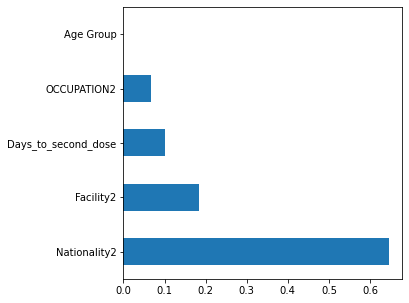

In [58]:
# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
#print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feat_importances = feat_importances.nlargest(5) # specify how many you need to see
feat_importances.plot(kind='barh' , figsize=(5,5))  #fig size you can change what your you want

In [59]:
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10203211,
       0.64651482, 0.06656489, 0.18488817])

In [60]:
indices = np.argsort(importances)[::-1]

In [61]:
indices   # 9 is the 10th column , indexing starts from 0

array([10, 12,  9, 11,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int64)

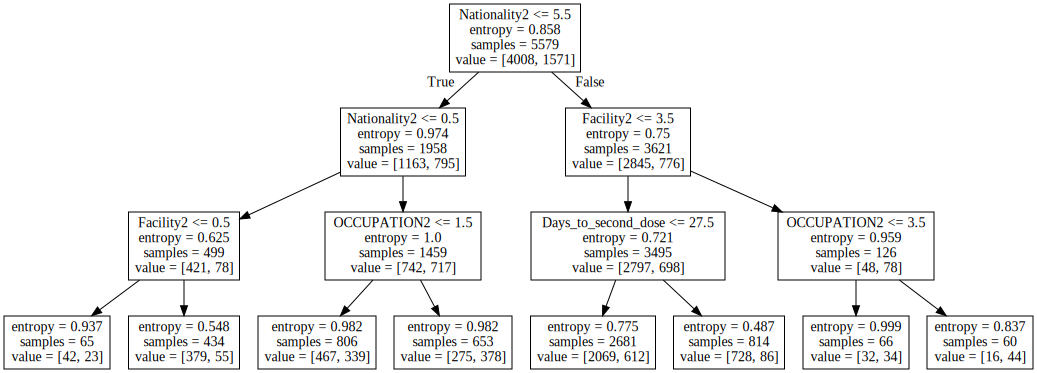

In [62]:
os.environ["PATH"] += os.pathsep + 'E:\\Machine learning course\\Raw data\\graphviz-2.38\\release\\bin'
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = x_train.columns)
graph = graphviz.Source(dot_data)  
graph

In [63]:
# use the model to make predictions with the test data
y_pred = clf.predict(x_test)

In [64]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [65]:
# combining 2 numpy arrays into one pandas dataframe
final_model_predictions = pd.DataFrame({'Actual':y_test, 'predictions':y_pred})

In [66]:
y_pred_prob = clf.predict_proba(x_test)

In [67]:
y_pred_prob 

array([[0.89434889, 0.10565111],
       [0.42113323, 0.57886677],
       [0.77172697, 0.22827303],
       ...,
       [0.89434889, 0.10565111],
       [0.77172697, 0.22827303],
       [0.77172697, 0.22827303]])

In [68]:
y_pred_prob = clf.predict_proba(x_test)[:, 1]

In [69]:
y_pred_prob

array([0.10565111, 0.57886677, 0.22827303, ..., 0.10565111, 0.22827303,
       0.22827303])

In [70]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 650
Accuracy: 0.73


In [71]:
final_model_predictions['Predicted_prob'] = y_pred_prob

In [72]:
final_model_predictions.head(10)

,Actual,predictions,Predicted_prob
39701,1,0,0.105651
46069,1,1,0.578867
93750,0,0,0.228273
21337,1,0,0.228273
124465,1,1,0.578867
121056,1,0,0.228273
68223,0,0,0.228273
80419,1,0,0.420596
65339,0,0,0.105651
97991,0,0,0.228273


In [73]:
final_model_predictions["New_Pred"] = np.where (final_model_predictions['Predicted_prob'] > 0.691,1,0)

In [74]:
final_model_predictions.head()

,Actual,predictions,Predicted_prob,New_Pred
39701,1,0,0.105651,0
46069,1,1,0.578867,0
93750,0,0,0.228273,0
21337,1,0,0.228273,0
124465,1,1,0.578867,0


In [75]:
# how did our model perform?
count_misclassified = (y_test != final_model_predictions["New_Pred"]).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 689
Accuracy: 0.73


In [76]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib 

Using matplotlib backend: Qt5Agg


In [77]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # correct 0 is sensitivity and correct is specificity

In [78]:
draw_cm( final_model_predictions.Actual, final_model_predictions.predictions )   # correct 0 is sensitivity and correct is specificity

C:\Users\amulya\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [79]:
# Recall : How many 1's you have correctly recalled/ predicted as 1's from actual 1's = (tp/tp+fn))
# Precision: How many 1's you have predicted correctly out of total 1's you have got from model=(tp/tp+fp))

In [80]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score(final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )

cm1 = metrics.confusion_matrix( final_model_predictions.Actual, final_model_predictions.predictions,[1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.73
Precision :  0.58
Recall :  0.24
Sensitivity :  0.24
Specificity :  0.93


C:\Users\amulya\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [81]:
auc_score = metrics.roc_auc_score( final_model_predictions.Actual, final_model_predictions.Predicted_prob  )
round( float( auc_score ), 2 )

0.68

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [83]:
y_pred = clf.predict(x_train)

In [84]:
fpr, tpr, thresholds = draw_roc( final_model_predictions.Actual, final_model_predictions.Predicted_prob )

In [85]:
# Saving  the Trained Model, serialization
import pickle
filename = "Decision_Tree.sav"
pickle.dump(clf, open(filename, 'wb'))

## Deciles 

In [86]:
final_model_predictions.head()

,Actual,predictions,Predicted_prob,New_Pred
39701,1,0,0.105651,0
46069,1,1,0.578867,0
93750,0,0,0.228273,0
21337,1,0,0.228273,0
124465,1,1,0.578867,0


In [87]:
final_model_predictions2 = final_model_predictions.drop(['predictions',"New_Pred"], axis=1, inplace= False) 

In [88]:
final_model_predictions2.head()

,Actual,Predicted_prob
39701,1,0.105651
46069,1,0.578867
93750,0,0.228273
21337,1,0.228273
124465,1,0.578867


In [89]:
final_model_predictions2.to_excel("final_predictions.xlsx")

In [90]:
final = pd.read_excel("final_predictions - Copy.xlsx")

In [91]:
pd.set_option("display.max_columns",10000)
final.head(10000)

,Unnamed: 0,Actual,Predicted_prob,Decile,max,min
0,46069,1,0.532438,1,0.532438,0.532438
1,124465,1,0.532438,1,0.532438,0.532438
2,121056,1,0.532438,1,0.532438,0.532438
3,120905,0,0.532438,1,0.532438,0.532438
4,69581,1,0.532438,1,0.532438,0.532438
...,...,...,...,...,...,...
5575,72341,0,0.100000,10,0.100000,0.100000
5576,7144,0,0.100000,10,0.100000,0.100000
5577,70975,0,0.100000,10,0.100000,0.100000
5578,66078,0,0.100000,10,0.100000,0.100000


In [92]:
final["Decile"].value_counts()

4     558
8     558
1     558
5     558
9     558
2     558
6     558
10    558
3     558
7     558
Name: Decile, dtype: int64

In [93]:
final = pd.read_excel("final_predictions - Copy - Copy.xlsx")

In [94]:
final.head()

,Unnamed: 0,Actual,Predicted_prob,Random,total/10,Rndom/values,Predicted_prob.1,Predicted_prob.2
0,46069.0,1.0,0.532438,0.0001,558.0,1.792115e-07,NaN,0.532439
1,124465.0,1.0,0.532438,0.0002,558.0,3.584229e-07,NaN,0.532439
2,121056.0,1.0,0.532438,0.0003,558.0,5.376344e-07,NaN,0.532439
3,120905.0,0.0,0.532438,0.0004,558.0,7.168459e-07,NaN,0.532439
4,69581.0,1.0,0.532438,0.0005,558.0,8.960573e-07,NaN,0.532439


In [95]:
final2 = final.drop(['Predicted_prob',"Random","Rndom/values",'total/10',"Predicted_prob.1"], axis=1, inplace= False) 

In [96]:
final2.head()

,Unnamed: 0,Actual,Predicted_prob.2
0,46069.0,1.0,0.532439
1,124465.0,1.0,0.532439
2,121056.0,1.0,0.532439
3,120905.0,0.0,0.532439
4,69581.0,1.0,0.532439


In [103]:
final2['decile'] = pd.qcut(final2['Predicted_prob.2'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
final2.head(2000)

,Unnamed: 0,Actual,Predicted_prob.2,decile
0,46069.0,1.0,0.532439,9
1,124465.0,1.0,0.532439,9
2,121056.0,1.0,0.532439,9
3,120905.0,0.0,0.532439,9
4,69581.0,1.0,0.532439,9
...,...,...,...,...
1995,121058.0,0.0,0.359639,7
1996,17725.0,1.0,0.359639,7
1997,26727.0,0.0,0.359640,7
1998,10108.0,0.0,0.359640,7


In [98]:
final2['decile'].value_counts()

1     558
2     558
3     558
4     558
5     558
6     558
7     558
8     558
9     558
10    558
Name: decile, dtype: int64